Train Iris Dataset using MLFlow

In [3]:
import seaborn as sns

In [46]:
# import iris dataset
iris = sns.load_dataset("planets")
iris

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


Create a Graph

<Axes: xlabel='sepal_length', ylabel='Count'>

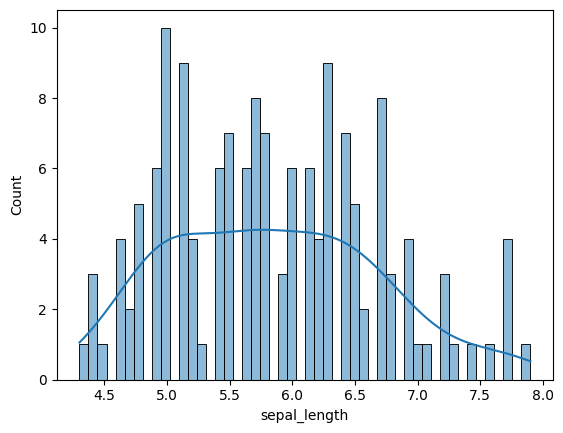

In [5]:
sns.histplot(iris, x="sepal_length", kde=True, bins=50)

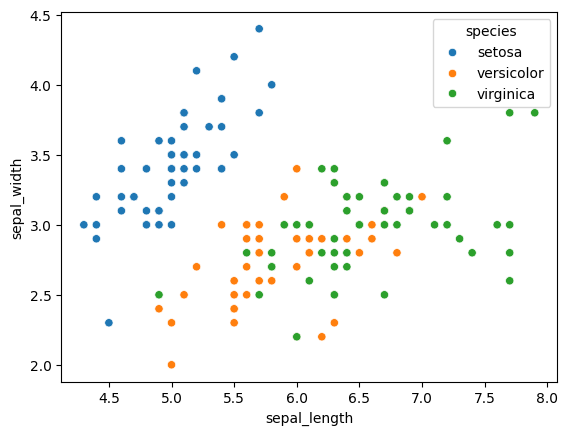

In [38]:
import matplotlib.pyplot as plt

PLOT_PATH = "iris_scatterplot.png"


sns.scatterplot(data=iris, x="sepal_length", y="sepal_width", hue="species")
plt.savefig(PLOT_PATH, dpi=300, bbox_inches="tight")

## Train model

In [10]:
from sklearn.model_selection import train_test_split


TEST_SIZE = 0.2

X = iris.drop(columns=["species"])
y = iris["species"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=42)

In [25]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)

In [26]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# X_train, X_test, y_train, y_test 

In [31]:
y_pred = model.predict(X_test)
y_pred

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

In [ ]:
# compute accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


## Register in MLFlow

```python

In [34]:
import mlflow

mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment("iris_classification")

2025/06/12 18:59:35 INFO mlflow.tracking.fluent: Experiment with name 'iris_classification' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/733306998055956384', creation_time=1749754775703, experiment_id='733306998055956384', last_update_time=1749754775703, lifecycle_stage='active', name='iris_classification', tags={}>

In [42]:
import mlflow.sklearn


with mlflow.start_run():
    mlflow.log_artifact(PLOT_PATH)
    mlflow.log_param("test_size", TEST_SIZE)
    mlflow.log_param("model_type", "DecisionTreeClassifier")
    mlflow.log_metric("accuracy", accuracy)
    mlflow.sklearn.log_model(model, "model")

2025/06/12 19:06:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run grandiose-yak-351 at: http://localhost:5000/#/experiments/733306998055956384/runs/774b8f378cdc455cbb02abcf52292acc
🧪 View experiment at: http://localhost:5000/#/experiments/733306998055956384
